In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print('Setup Complete')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv
Setup Complete


In [109]:
data = pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')

In [79]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [80]:
data.shape

(99457, 10)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


No missing values. Are there any duplicates?

In [82]:
data.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


Let's check the values of each of the categorical columns

In [83]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [84]:
data.category.value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

Clothing was bought the most often by far, second group are Cosmetics and Food & Beverage categories, third group Toys and Shoes, and lastly Souvenir, Technology and Books.

In [85]:
data.payment_method.value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [86]:
data['shopping_mall'].value_counts()

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

Most purchases were made in the Mall of Istanbul, Kanyon and Metrocity, while Zorlu Center, Cevahir AVM, Forum Istanbul, Viaport Outlet and Emaar Square Mall all had a similar number of purchases, around five thousand.

In [87]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

Check the overall statistics

In [88]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


The age range is 18-69, the average age is 43.427089

In [89]:
data.age.nunique()
#how many different age values are there?

52

In [90]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [91]:
data.invoice_date.sort_values()

36199    1/1/2021
45626    1/1/2021
74986    1/1/2021
9456     1/1/2021
36006    1/1/2021
           ...   
5443     9/9/2022
92297    9/9/2022
45393    9/9/2022
5555     9/9/2022
15220    9/9/2022
Name: invoice_date, Length: 99457, dtype: object

# Creating a 'sales' column, since the price column deals with prices per unit

In [110]:
data['sales'] = data.quantity*data.price

Questions to consider:
1. Who spent more, men or women?
2. Who bought more from each category, men or women?
3. Which age groups spent more?
4. Which age group bought more from each category?
5. What is the most expensive item bought in each mall?
6. Which payment method had the most transactions, and which payment method had the largest money flow?
7. Which age group used which payment method the most?
8. Which payment method was used the most by women, and which by men?
9. Which shopping mall earned the most money?
10. Which category was sold the most in each mall?
11. Which age group shopped the most in each mall?
12. What part of the year has the most sales?
13. What part of the year is each mall visited the most?
14. Is there a spike in sales during Ramadan?
15. Does some age group go shopping more in a particular part of the year?
16. Which category has the most items per purchase?
17. Does the same customer shop more times?
18. Based on all this information, what should each mall focus on advertising and when?



# Who spent more, men or women?

In [93]:
data.gender.value_counts()

Female    59482
Male      39975
Name: gender, dtype: int64

In [94]:
difference = (data.gender=='Female').sum()-(data.gender=='Male').sum()
difference*100/len(data)

19.61350131212484

Around 20% more women visited shopping malls compared to men.

In [95]:
data.groupby(by=['gender']).sales.mean()

gender
Female    2525.253623
Male      2534.050237
Name: sales, dtype: float64

On average, men spent slightly more money than women. 

In [96]:
#sns.barplot(x=data.gender, y=data.price)

# Who bought more from each category, men or women?

In [97]:
#how many items of each category were bought
data.groupby(by=['category']).quantity.sum().sort_values(ascending=False)

category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Toys                30321
Shoes               30217
Technology          15021
Books               14982
Souvenir            14871
Name: quantity, dtype: int64

The distribution of these quantities corresponds to the frequency of sales in each category.

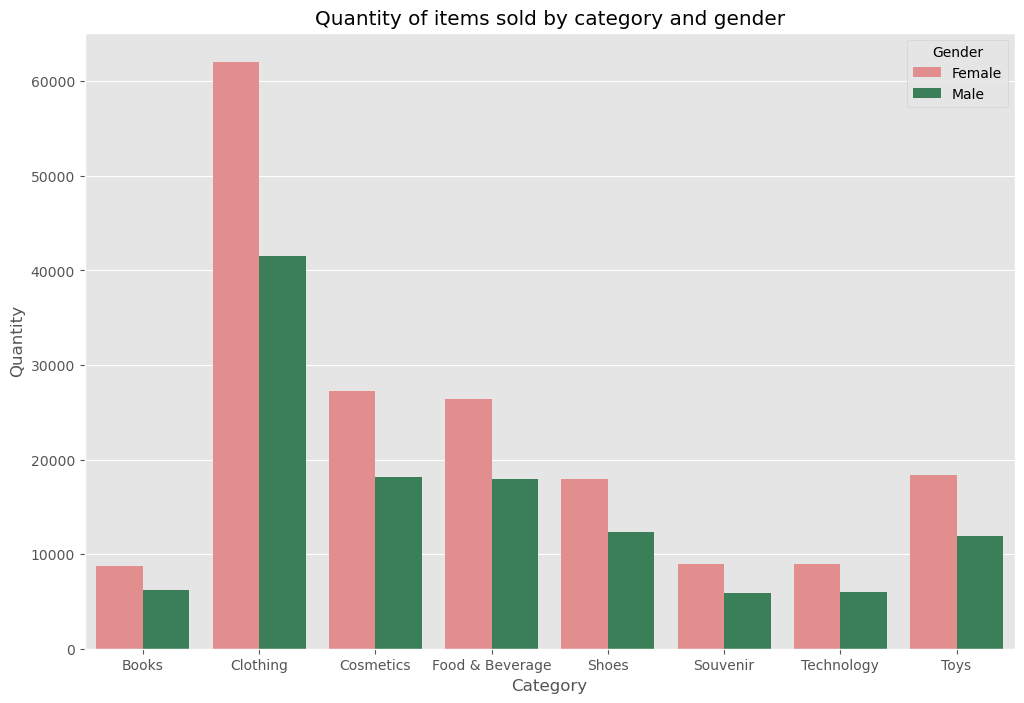

In [98]:
data_2 = data.groupby(['category', 'gender']).sum()
data_2.reset_index(inplace=True)
rgb = [(240,128,128), (46,139,87)]                
colors = [tuple(t / 255 for t in x) for x in rgb]
# palette = {
#     'Female': 'tab:salmon',
#     'Male': 'tab:sea green',
#     }
sns.barplot(x='category', y='quantity', hue= 'gender', data=data_2, palette=colors)
plt.title('Quantity of items sold by category and gender')
plt.xlabel(xlabel='Category')
plt.ylabel(ylabel='Quantity')
plt.legend(title='Gender')

In [99]:
#qq= data.groupby(['category', 'gender']).quantity.sum().unstack('gender').plot(kind='bar')


Women bought more from each category, especially clothes. But each difference between the quantity of items bought by men and women is around 20%, thus could be attributed to the fact that 20% more women visited the malls.

In [100]:
#data.groupby(['category','gender']).sales.sum().unstack('gender').plot(kind='bar')

# Which category has the most expensive items?

In [101]:
data.groupby('category').sales.describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Books,4981.0,167.547260,131.909394,15.15,60.60,136.35,242.40,378.75
Clothing,34487.0,3305.500364,2597.404620,300.08,1200.32,2700.72,4801.28,7502.00
Cosmetics,15097.0,449.947864,351.873613,40.66,162.64,365.94,650.56,1016.50
Food & Beverage,14776.0,57.494251,45.385558,5.23,20.92,47.07,83.68,130.75
Shoes,10034.0,6632.793649,5181.163758,600.17,2400.68,5401.53,9602.72,15004.25
Souvenir,4999.0,127.190368,101.236358,11.73,46.92,105.57,187.68,293.25
Technology,4996.0,11581.735388,9070.511913,1050.00,4200.00,9450.00,16800.00,26250.00
Toys,10087.0,394.609521,307.505112,35.84,143.36,322.56,573.44,896.00


Text(0, 0.5, 'Sales')

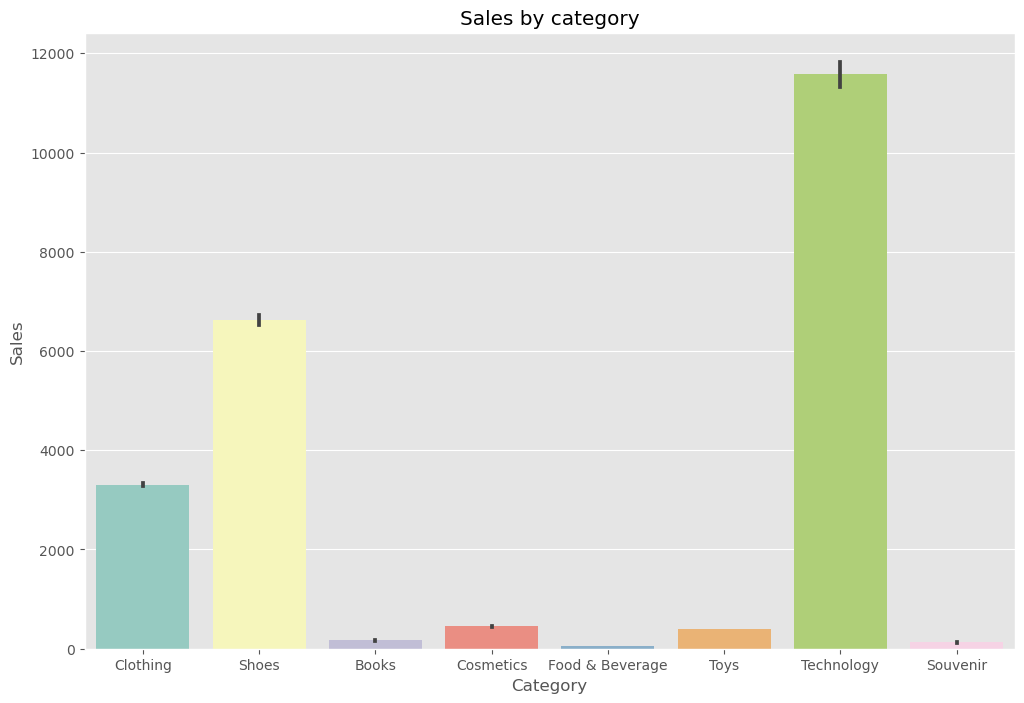

In [102]:
palette = sns.color_palette('Set3', len(data))
sns.barplot(x=data.category, y=data.sales, palette=palette)
plt.title('Sales by category')
plt.xlabel(xlabel='Category')
plt.ylabel(ylabel='Sales')


# Which age groups spent more?

In [111]:
data['age_group']= pd.cut(data['age'], bins=[18, 30, 45, 60, 70])

In [104]:
data['age_group'].value_counts()

(30, 45]    28830
(45, 60]    28434
(18, 30]    23180
(60, 70]    17169
Name: age_group, dtype: int64

Text(0, 0.5, 'Number of Visitors')

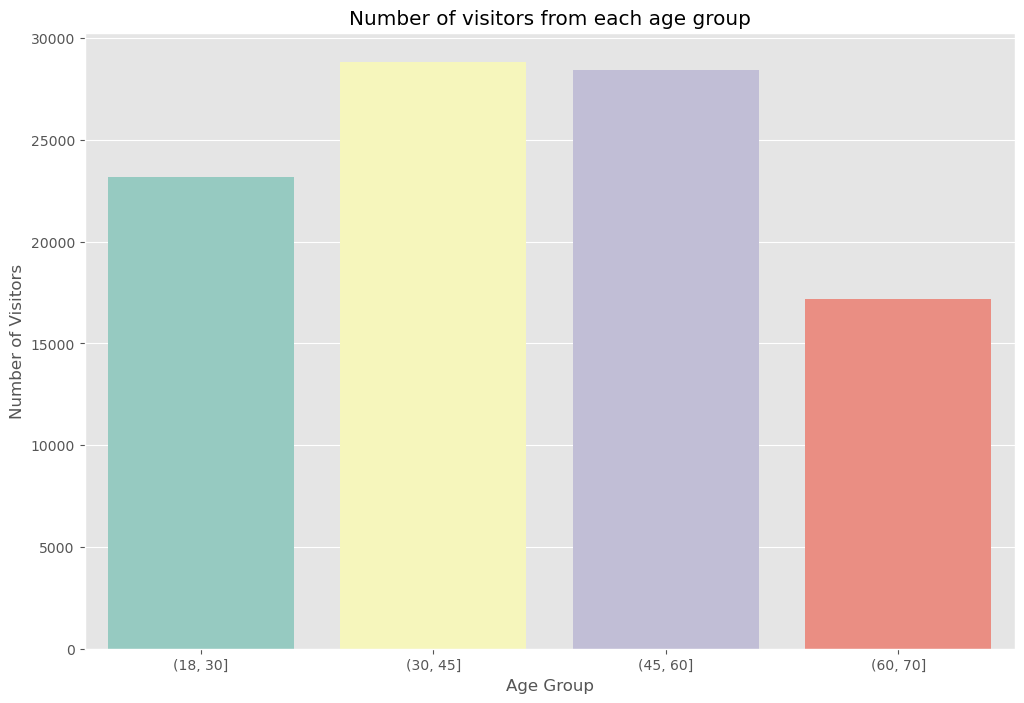

In [105]:
pal = sns.color_palette("Set3", len(data))
sns.countplot(x='age_group', data=data, palette=pal)
plt.title('Number of visitors from each age group')
plt.xlabel(xlabel='Age Group')
plt.ylabel(ylabel='Number of Visitors')


The 30-45 and 45-60 age groups went shopping the most, followed by the 18-30 group, while the 60-70 group went the least.

In [106]:
pal = sns.color_palette("Greens_d", len(data_3))

data_3= data.groupby('age_group').sum()
data_3.reset_index(inplace=True)
sns.barplot(x='age_group', y='sales', data=data_3, palette=pal)


plt.title('Sales by Age Group')
plt.xlabel(xlabel='Age Group')
plt.ylabel(ylabel='Sales')


NameError: name 'data_3' is not defined

In [ ]:
#data.groupby('age_group').sales.sum().plot(kind='bar')

Overall, the spending ability is the highest in the 30-45 group, while the 45-60 group is following close, with the 60-70 group having the lowest spending ability.
This might be impacted, in part, by the number of people in the age intervals not being equally distributed.

# Which age group bought more from each category?

In [ ]:
palette = sns.color_palette('Set3', len(data_4))

data_4=data.groupby(['age_group','category']).sum()
data_4.reset_index(inplace=True)
sns.barplot(x='age_group', y='sales', hue='category', data=data_4, palette=palette)
plt.title('Sales by Category and Age Group')
plt.xlabel(xlabel='Age Group')
plt.ylabel(ylabel='Sales')
plt.legend(title='Category')

The 45-60 group bought slightly more clothes than the 30-45 group, even though the 30-45 group spent more money overall.

In [ ]:
#data.groupby(['age_group','category']).sales.sum().unstack('category').plot(kind='bar')

# Which mall had the highest sales by category?

In [ ]:
plt.figure(figsize=(16,10))
palette=sns.color_palette('Set3', len(data))
sns.countplot(x=data.shopping_mall, palette=palette)
plt.title('Number of Visitors in each Shopping Mall')
plt.xlabel(xlabel='Shopping Mall')
plt.ylabel(ylabel='Number of Visitors')

Most purchases were made in the Mall of Istanbul, Kanyon and Metrocity, while Zorlu Center, Cevahir AVM, Forum Istanbul, Viaport Outlet and Emaar Square Mall all had a similar number of purchases, around five thousand.

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Sales by Shopping Mall and Category')


palette=sns.color_palette('Set3', len(data_5))
data_5 = data.groupby(['shopping_mall', 'category']).sum()
data_5.reset_index(inplace=True)
sns.barplot(x='shopping_mall', y='sales', hue='category', data=data_5, palette= palette)
plt.xlabel(xlabel='Shopping Mall')
plt.ylabel(ylabel='Sales')
plt.legend(title='Category')


The revenue of each shopping mall mainly corresponds to the number of visitors.

# Which payment method had the most transactions, and which payment method had the largest money flow?

In [ ]:
data.columns

In [ ]:
pal = sns.color_palette('Set3', len(data))
sns.countplot(x=data.payment_method, palette=pal)
plt.title('Frequency of Payment Methods')
plt.xlabel(xlabel='Payment Method')
plt.ylabel(ylabel='Frequency')

In [ ]:
pal = sns.color_palette("Greens_d", len(data_6))
data_6 = data.groupby('payment_method').sum()
data_6.reset_index(inplace=True)
sns.barplot(x='payment_method', y='sales', data=data_6, palette=pal)
plt.title('Money Flow by Payment Method')
plt.xlabel(xlabel='Payment Method')
plt.ylabel(ylabel='Money Flow')

Cash was the most used payment method, and had the largest money flow as well, while payment via debit card was the least frequent payment method.

# Which payment method was used the most by women, and which by men?

In [ ]:
data_7=data.groupby(['payment_method','gender']).sum()
data_7.reset_index(inplace=True)
rgb = [(240,128,128), (46,139,87)]                
colors = [tuple(t / 255 for t in x) for x in rgb]
sns.barplot(x='payment_method', y='sales', hue='gender', data=data_7, palette=colors)
plt.title('Usage of Payment Method by Gender')
plt.xlabel(xlabel='Payment Method')
plt.ylabel(ylabel='Sales')
plt.legend(title='Gender')


# Which age group used which payment method the most?

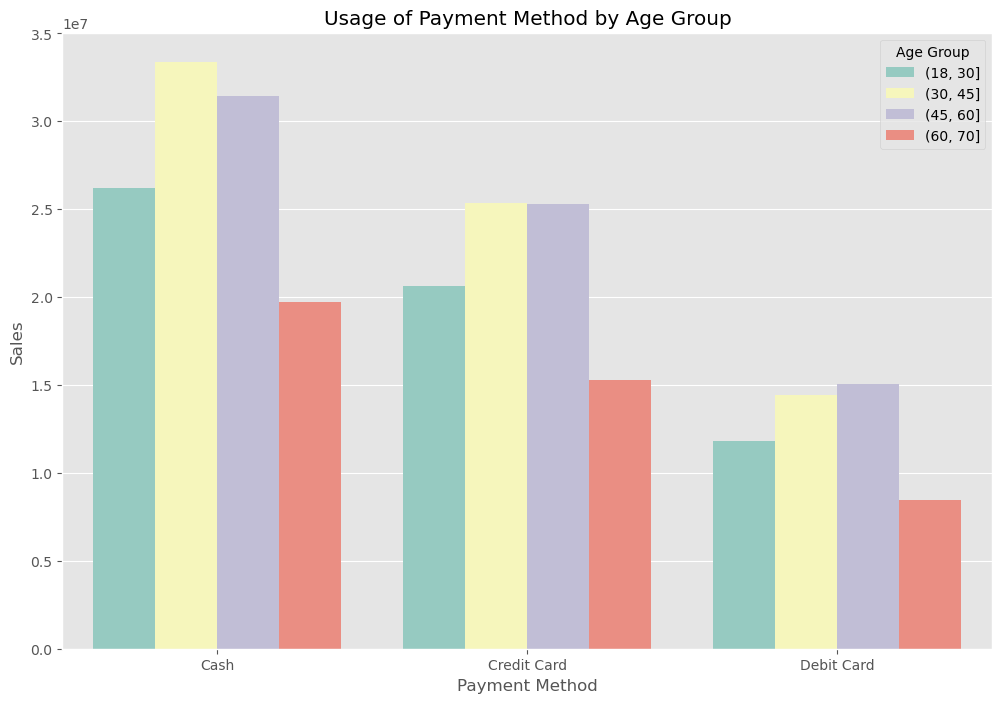

In [113]:
data_7=data.groupby(['payment_method','age_group']).sum()
data_7.reset_index(inplace=True)
pal=sns.color_palette('Set3', len(data_7))
sns.barplot(x='payment_method', y='sales', hue='age_group', data=data_7, palette=pal)
plt.title('Usage of Payment Method by Age Group')
plt.xlabel(xlabel='Payment Method')
plt.ylabel(ylabel='Sales')
plt.legend(title='Age Group')

Cash was used the most often by all age groups. The 30-45 and 45-60 groups both used credit cards as a payment method almost equally often. Debit cards were used slightly more often by the 45-60 group compared to the 30-45 group.

# Which age group shopped the most in each mall?

In [ ]:
plt.figure(figsize=(15,10))
palette=sns.color_palette('Set3', len(df))
df = data.groupby(['age_group', 'shopping_mall']).sum()
df.reset_index(inplace=True)
sns.barplot(x='shopping_mall', y='sales', hue='age_group', data=df, palette=palette)
plt.title('Sales in each Shopping Mall by Age Group')
plt.xlabel(xlabel='Shopping Mall')
plt.ylabel(ylabel='Sales')
plt.legend(title='Age Group')

# What part of the year has the most sales?

In [119]:
data.invoice_date = pd.to_datetime(data.invoice_date)

In [120]:
data['month']=data.invoice_date.dt.month

In [ ]:
data.head()


In [ ]:
data1=data.groupby('month').sum()
data1.reset_index(inplace=True)
sns.lineplot(data=data1, x="month", y="sales")
plt.title('Sales by Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Sales')
#plt.legend(title='Age Group')

In [ ]:
sns.countplot(x='month', data=data1)

# Does some age group go shopping more in a particular part of the year?

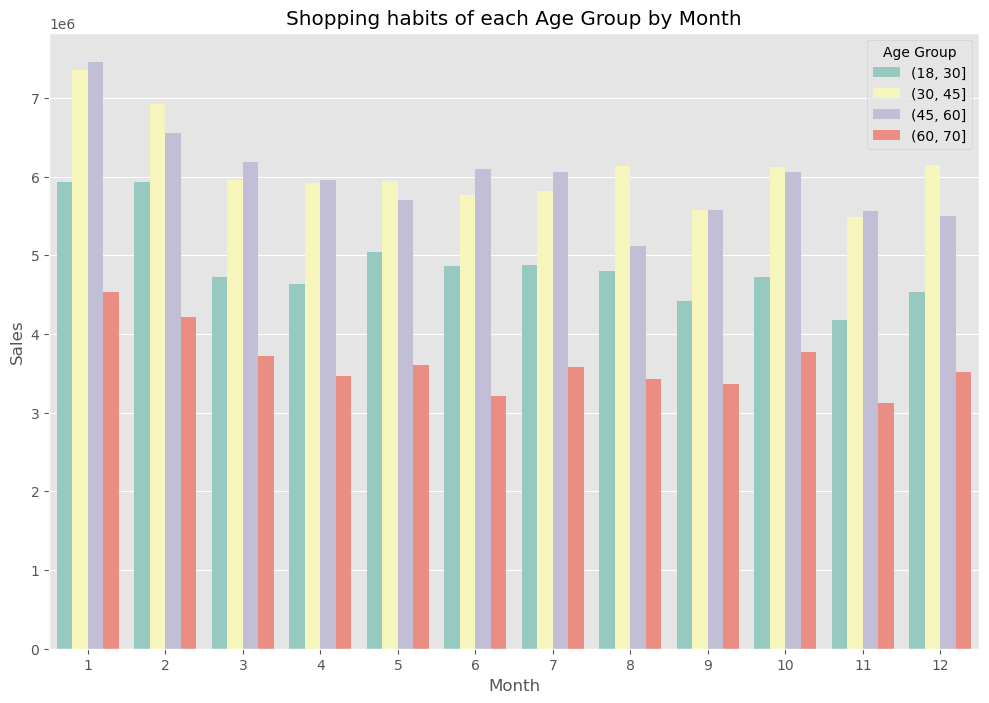

In [122]:
data2=data.groupby(['month', 'age_group']).sum()
data2.reset_index(inplace=True)
palette=sns.color_palette('Set3', len(data2))
sns.barplot(x='month',y='sales', hue='age_group', data=data2, palette=palette)
plt.title('Shopping habits of each Age Group by Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Sales')
plt.legend(title='Age Group')